## Ecommerce Trade Sales

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pytrends.request import TrendReq
from statsmodels.tsa.stattools import kpss, adfuller

### Reading and Filtering data

In [2]:
data = pd.read_csv('../../data/retailEcommercesales/retailEcommerceSales.csv',sep=',')
data.head(2)

,REF_DATE,GEO,DGUID,Sales,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2016-01,Canada,2016A000011124,"Retail trade, unadjusted\n [44-453]",Dollars,81,thousands,3,v108795018,1.1,37415147,A,NaN,NaN,0
1,2016-01,Canada,2016A000011124,"Electronic shopping and mail-order houses, una...",Dollars,81,thousands,3,v108795019,1.2,679612,B,NaN,NaN,0


In [3]:
# data filter
retailEcommercesales = data[~data["Sales"].str.contains('unadjusted')]
retailEcommercesales = retailEcommercesales.filter(['REF_DATE','VALUE'])

# rename columns
retailEcommercesales = retailEcommercesales.rename(columns = {'REF_DATE': 'Date', 'VALUE': 'Ecommerce_sales'})

In [4]:
retailEcommercesales.head(2)

,Date,Ecommerce_sales
3,2016-01,977198
7,2016-02,1006610


### Time series plot of Ecommerce trade sales

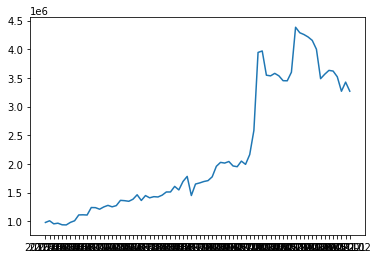

In [5]:
retailEcommercesales_dup = retailEcommercesales.copy()
retailEcommercesales_dup.index = retailEcommercesales_dup['Date']
plt.plot(retailEcommercesales_dup['Ecommerce_sales'])
plt.show()

In [6]:
retailEcommercesales_ts = retailEcommercesales.set_index('Date')

In [7]:
retailEcommercesales_ts.head(2)

,Ecommerce_sales
Date,
2016-01,977198
2016-02,1006610


**Growth Rate of Ecommerce Retail Sales**

In [8]:
retailEcommercesales_ts['Growth_rate'] = retailEcommercesales_ts.pct_change()
retailEcommercesales_ts['Growth_rate'][0] = '0'   # removing NA

C:\Users\hp\AppData\Local\Temp\ipykernel_16816\3065636090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retailEcommercesales_ts['Growth_rate'][0] = '0'   # removing NA


**Time series for growth rate**

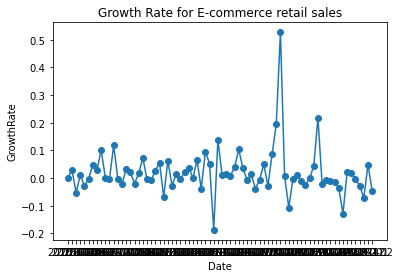

<Figure size 1600x500 with 0 Axes>

In [9]:
# Plot

plt.plot(retailEcommercesales_ts['Growth_rate'], marker = 'o')

# Labelling
plt.xlabel("Date")
plt.ylabel("GrowthRate")
plt.title("Growth Rate for E-commerce retail sales")
plt.figure(figsize = (16,5), dpi = 100)

# Display
plt.show()

### Stationarity Statistical test

**KPSS and ADF Test**

In [10]:
def kpss_test(timeseries):
    print("Result from the KPSS Stationarity Test: ")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"])
    
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    #print(kpss_output)
    if kpsstest[1] > 0.05:
        print("The series is stationary with 5% level of significant")
    else:
        print("The series is not stationary with 5% level of significant")
        
def adf_test(timeseries):
    print("Result from the ADF Stationarity Test: ")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index = [
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    
    if dftest[1] < 0.05 :
        print("The series is Stationary with 5% level of significant")
    else:
        print("The series is Non-Stationary with 5% level of significant")

**Note:** Assuming 5% level of significance.

In [11]:
kpss_test(retailEcommercesales_ts['Growth_rate'])
adf_test(retailEcommercesales_ts['Growth_rate'])

Result from the KPSS Stationarity Test: 


C:\Users\hp\miniconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


The series is stationary with 5% level of significant
Result from the ADF Stationarity Test: 
The series is Stationary with 5% level of significant


### Keywords extraction using PyTrend

In [12]:
pytrends = TrendReq(hl = 'en-us', backoff_factor = 0.1)

def ecommerce_trend(keywords = [''],category = '280'):  #cat - 280
    
    """ 
    Function for getting trends for selected keywords
        
        arguments: 
        
            Keywords: List of String ser
            category: String: stores the code for category
        
        returns: Related queries and related topics from google trend as a data frame
    """
    kw_list = keywords
    cat = category
    timeframe = '2004-01-01 2022-05-11'
    geo = 'CA'
    
    pytrends.build_payload(kw_list, cat, timeframe, geo, gprop = '')
    data = pytrends.interest_over_time()
    queries = pytrends.related_queries()
    topics = pytrends.related_topics()
    
    return data, queries, topics

In [26]:
keywords_csv = pd.read_csv('../../data/keywords_data/ECOMMERCE.csv')

In [29]:
keywords_frame = pd.DataFrame()
for i in range(len(keywords_csv)):
    keyword_col = keywords_csv['Keywords'][i]
    keyword_ts, queries, topics = ecommerce_trend(keywords = [i],category = '280')
    keywords_frame[i] = keyword_ts

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [27]:
len(keywords_csv)

33

### Normalizing time series

In [13]:
PayPal_ts, queries, topics = ecommerce_trend(keywords = ['PayPal'],category = '340')

In [35]:
keywordsDictQuery = dict() #Dictionary for queries
keywordsDictTopic = dict() #Dictionary for topic


for index, row in keywords_csv.iterrows():
    
    #Calling function
    data, queries, topics = ecommerce_trend(keyword=[''],category=str(row['SubcatNo']))
    
    
    #Code to append data for different columns in data frame
    
    if index==0:
        FinalData, queries, topics=ecommerce_trend(keyword=[''],category=str(row['SubcatNo']))
        FinalData.rename(columns = {'':str(row['SubcatNo'])}, inplace = True)
        FinalData=FinalData.drop(columns=['isPartial'])
    else:
        data, queries, topics=ecommerce_trend(keyword=[''],category=str(row['SubcatNo']))
        data.rename(columns = {'':str(row['SubcatNo'])}, inplace = True)
        data=data.drop(columns=['isPartial'])
        data = data[str(row['SubcatNo'])]
        FinalData = FinalData.join(data)
    
    #Code to store queries in a dictionary
    queries = queries['']['top']
    top5_query = pd.DataFrame(queries['query'].copy().head(5))
    top5_query = top5_query['query'].values.tolist()  
    keywordsDictQuery[str(row['SubcatNo'])] = top5_query
    
    #Code to store topics in a dictionary
    topics = topics['']['top']
    top5_topic = pd.DataFrame(topics['topic_title'].copy().head(5))
    top5_topic = top5_topic['topic_title'].values.tolist()
    keywordsDictTopic[str(row['SubcatNo'])] = top5_topic

TypeError: ecommerce_trend() got an unexpected keyword argument 'keyword'

In [14]:
def normalization(x):
    x_min,x_max = min(x) , max(x)
    for i in range(len(x)):
        value = (x[i] - x_min)/(x_max - x_min)
        return value

**Dictionary of keywords**

In [15]:
category_ts, queries, topics = ecommerce_trend(keywords = [''],category = '340')  #function calling

keyword_query_frame = dict()  #Dictionary for queries
keyword_topic_frame = dict()  #Dictionary for topic

# keywords from queries
keyword_rising_query = queries['']['rising']['query'].unique().tolist() 
keyword_top_query = queries['']['top']['query'].unique().tolist()

# keywords from topic
keyword_rising_topics = topics['']['rising']['topic_title'].unique().tolist() 
keyword_top_topics = topics['']['top']['topic_title'].unique().tolist()

In [16]:
# keywords dict

keyword_query_frame['340'] = keyword_top_query
keyword_topic_frame['340'] = keyword_top_topics

In [17]:
keyword_topic_frame

{'340': ['PayPal',
  'Payment',
  'Money',
  'Canada',
  'Shopify',
  'Number',
  'Western Union',
  'Bank',
  'MoneyGram International Inc',
  'PayPal CA ltd',
  'Account',
  'Invoice',
  'Moneris',
  'Credit',
  'TD Canada Trust',
  'Credit card',
  'E-commerce',
  'Cheque',
  'Google',
  'Electronic funds transfer',
  'Routing number']}

### Evaluating Category Time Series

In [18]:
category_ts = category_ts.drop(columns = 'isPartial')
category_ts['Growth_rate'] = category_ts.pct_change()
category_ts['Growth_rate'][0] = '0'

C:\Users\hp\AppData\Local\Temp\ipykernel_16816\3972822904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_ts['Growth_rate'][0] = '0'


In [19]:
category_ts.head(2)

,,Growth_rate
date,,
2004-01-01,90,0.000000
2004-02-01,93,0.033333


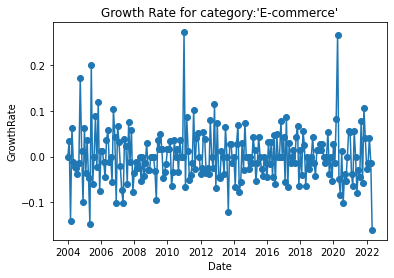

<Figure size 1600x500 with 0 Axes>

In [20]:
# Plot
plt.plot(category_ts['Growth_rate'], marker = 'o')

# Labelling 
plt.xlabel("Date")
plt.ylabel("GrowthRate")
plt.title("Growth Rate for category:'E-commerce'")
plt.figure(figsize = (16,5), dpi = 100)


# Display
plt.show()

**Category Stationarity Test**

In [21]:
kpss_test(category_ts['Growth_rate'])

Result from the KPSS Stationarity Test: 
The series is stationary with 5% level of significant


C:\Users\hp\miniconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [22]:
adf_test(category_ts['Growth_rate'])

Result from the ADF Stationarity Test: 
The series is Stationary with 5% level of significant


### Keywords Time Series

In [23]:
for key, value in keyword_topic_frame.items():
    for j in range(len(value)):
        keyword = [str(value[j])]
        topicKeywords_ts, queries, topics = ecommerce_trend(keywords = keyword,category = str(key))  #function calling
        if len(topicKeywords_ts) != 0:
            topicKeywords_ts = topicKeywords_ts.drop(columns = 'isPartial')
            topicKeywords_ts['Growth_rate'] = topicKeywords_ts[keyword].pct_change()
            topicKeywords_ts['Growth_rate'][0] = '0'                       
            adf_test(topicKeywords_ts['Growth_rate'])
            kpss_test(topicKeywords_ts['Growth_rate'])

C:\Users\hp\AppData\Local\Temp\ipykernel_16816\2480962880.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topicKeywords_ts['Growth_rate'][0] = '0'


Result from the ADF Stationarity Test: 
The series is Stationary with 5% level of significant
Result from the KPSS Stationarity Test: 
The series is stationary with 5% level of significant


C:\Users\hp\AppData\Local\Temp\ipykernel_16816\2480962880.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topicKeywords_ts['Growth_rate'][0] = '0'


Result from the ADF Stationarity Test: 
The series is Stationary with 5% level of significant
Result from the KPSS Stationarity Test: 
The series is stationary with 5% level of significant


C:\Users\hp\AppData\Local\Temp\ipykernel_16816\2480962880.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topicKeywords_ts['Growth_rate'][0] = '0'
C:\Users\hp\miniconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Result from the ADF Stationarity Test: 
The series is Stationary with 5% level of significant
Result from the KPSS Stationarity Test: 
The series is stationary with 5% level of significant


C:\Users\hp\AppData\Local\Temp\ipykernel_16816\2480962880.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topicKeywords_ts['Growth_rate'][0] = '0'
C:\Users\hp\miniconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Result from the ADF Stationarity Test: 
The series is Stationary with 5% level of significant
Result from the KPSS Stationarity Test: 
The series is stationary with 5% level of significant


C:\Users\hp\AppData\Local\Temp\ipykernel_16816\2480962880.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topicKeywords_ts['Growth_rate'][0] = '0'


Result from the ADF Stationarity Test: 


MissingDataError: exog contains inf or nans